In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator
#%matplotlib inline

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [38]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [41]:
def fill_null(data):
  for i in data:
    if data[i].dtype == object:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
    else:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
  return data
train_x= fill_null(train_data)
test_x = fill_null(test_data)

In [42]:
nominal_column = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','Functional','GarageType','PavedDrive','SaleType']
ordinal_column = ['Utilities','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','CentralAir','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Heating','RoofMatl','Electrical','GarageFinish','GarageQual','GarageCond','SaleCondition']

In [43]:
numerical_column = pd.DataFrame()
nominal = pd.DataFrame()
ordinal = pd.DataFrame()

numerical_test = pd.DataFrame()
nominal_test = pd.DataFrame()
ordinal_test = pd.DataFrame()

In [44]:
for i in train_x:
  if (i not in ordinal_column) and (i not in nominal_column):
    numerical_column[i] = train_x[i]
  if (i not in ordinal_column) and (i not in nominal_column) and (i != 'SalePrice'):
    numerical_test[i] = test_x[i]
#numerical_column

In [45]:
nominal = train_x.filter(nominal_column,axis = 1)
ordinal = train_x.filter(ordinal_column,axis = 1)
nominal_test = test_x.filter(nominal_column,axis = 1)
ordinal_test = test_x.filter(ordinal_column,axis = 1)
ordinal['SalePrice'] = train_x['SalePrice']
nominal['SalePrice'] = train_x['SalePrice']

In [46]:
nominal.loc[nominal['Exterior1st'] == nominal['Exterior2nd'],'Exterior'] = 1
nominal.loc[nominal['Exterior1st'] != nominal['Exterior2nd'],'Exterior'] = 2
nominal.loc[nominal['Condition1'] == nominal['Condition2'],'Condition'] = 1
nominal.loc[nominal['Condition1'] != nominal['Condition2'],'Condition'] = 2
nominal = nominal.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

nominal_test.loc[nominal_test['Exterior1st'] == nominal_test['Exterior2nd'],'Exterior'] = 1
nominal_test.loc[nominal_test['Exterior1st'] != nominal_test['Exterior2nd'],'Exterior'] = 2
nominal_test.loc[nominal_test['Condition1'] == nominal_test['Condition2'],'Condition'] = 1
nominal_test.loc[nominal_test['Condition1'] != nominal_test['Condition2'],'Condition'] = 2
nominal_test = nominal_test.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [47]:
def mean_encoding(data,data1):
  for i in data:
    if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition':
      Mean_encoded_subject = data.groupby([i])['SalePrice'].mean().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      data1[i] =  data1[i].map(new_dict) 
  return data,data1  
def count_encoding(data,data1):
  for i in data:
    if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition':
      Mean_encoded_subject = data[i].value_counts().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      data1[i] =  data1[i].map(new_dict) 
  return data,data1

In [48]:
nominal_mean_encode,nominal_test_mean_encode = mean_encoding(nominal,nominal_test)
nominal_count_encode,nominal_test_count_encode = count_encoding(nominal,nominal_test)

In [49]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
ordinal['Utilities'] = ordinal['Utilities'].map(utilities)
ordinal_test['Utilities'] = ordinal_test['Utilities'].map(utilities)

housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
ordinal['HouseStyle'] = ordinal['HouseStyle'].map(housStyle)
ordinal_test['HouseStyle'] = ordinal_test['HouseStyle'].map(housStyle)

extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['ExterQual'] = ordinal['ExterQual'].map(extraq)
ordinal_test['ExterQual'] = ordinal_test['ExterQual'].map(extraq)
extrac = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['ExterCond'] = ordinal['ExterCond'].map(extrac)
ordinal_test['ExterCond'] = ordinal_test['ExterCond'].map(extrac)


bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['BsmtQual'] = ordinal['BsmtQual'].map(bstmq)
ordinal_test['BsmtQual'] = ordinal_test['BsmtQual'].map(bstmq)
bstmc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['BsmtCond'] = ordinal['BsmtCond'].map(bstmc)
ordinal_test['BsmtCond'] = ordinal_test['BsmtCond'].map(bstmc)

bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
ordinal['BsmtFinType1'] = ordinal['BsmtFinType1'].map(bstmt1)
ordinal_test['BsmtFinType1'] = ordinal_test['BsmtFinType1'].map(bstmt1)
bstmt2 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
ordinal['BsmtFinType2'] = ordinal['BsmtFinType2'].map(bstmt2)
ordinal_test['BsmtFinType2'] = ordinal_test['BsmtFinType2'].map(bstmt2)

bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
ordinal['BsmtExposure'] = ordinal['BsmtExposure'].map(bstmexp)
ordinal_test['BsmtExposure'] = ordinal_test['BsmtExposure'].map(bstmexp)

heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['HeatingQC'] = ordinal['HeatingQC'].map(heat)
ordinal_test['HeatingQC'] = ordinal_test['HeatingQC'].map(heat)

elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}
ordinal['Electrical'] = ordinal['Electrical'].map(elec)
ordinal_test['Electrical'] = ordinal_test['Electrical'].map(elec)

kitch = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['KitchenQual'] = ordinal['KitchenQual'].map(kitch)
ordinal_test['KitchenQual'] = ordinal_test['KitchenQual'].map(kitch)

grgq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['GarageQual'] = ordinal['GarageQual'].map(grgq)
ordinal_test['GarageQual'] = ordinal_test['GarageQual'].map(grgq)
grgc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['GarageCond'] = ordinal['GarageCond'].map(grgc)
ordinal_test['GarageCond'] = ordinal_test['GarageCond'].map(grgc)

In [50]:
def mean_encoding1(data,data1):
  for i in data:
    if i != 'SalePrice' and data[i].dtype == object:
      Mean_encoded_subject = data.groupby([i])['SalePrice'].mean().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      data1[i] =  data1[i].map(new_dict)
  return data,data1  
def count_encoding1(data,data1):
  for i in data:
    if i != 'SalePrice' and data[i].dtype == object:
      Mean_encoded_subject = data[i].value_counts().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      data1[i] =  data1[i].map(new_dict) 
  return data,data1

In [51]:
ordinal_mean_encode,ordinal_test_mean_encode = mean_encoding1(ordinal,ordinal_test)
ordinal_count_encode,ordinal_test_count_encode = count_encoding1(ordinal,ordinal_test)

In [52]:
numerical_column.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [53]:
lii = ['GarageYrBlt','YearBuilt','YearRemodAdd']
for i in lii:
  Mean_encoded_subject = numerical_column.groupby([i])['SalePrice'].mean().to_dict()
  Mean_encoded_subject1 = numerical_test[i].value_counts().to_dict() 
  sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
  sorted_d1 = dict(sorted(Mean_encoded_subject1.items(), key=operator.itemgetter(1)))
  #print('Dictionary in ascending order by value : ',sorted_d)
  li = list(sorted_d)
  li1 = list(sorted_d1)
  new_dict = {}
  new_dict1 = {}
  for J in li:
    new_dict[J] = li.index(J)+1
  for J in li1:
    new_dict1[J] = li1.index(J)+1
  #print(new_dict)
  numerical_column[i] =  numerical_column[i].map(new_dict)
  numerical_test[i] =  numerical_test[i].map(new_dict1) 

In [54]:
numerical_column = numerical_column.drop(['MoSold','YrSold'],axis = 1)
numerical_test = numerical_test.drop(['MoSold','YrSold'],axis = 1)

In [55]:
numerical_column

MSSubClass  LotFrontage  LotArea  ...  PoolArea  MiscVal  SalePrice
0             60         65.0     8450  ...         0        0     208500
1             20         80.0     9600  ...         0        0     181500
2             60         68.0    11250  ...         0        0     223500
3             70         60.0     9550  ...         0        0     140000
4             60         84.0    14260  ...         0        0     250000
...          ...          ...      ...  ...       ...      ...        ...
1455          60         62.0     7917  ...         0        0     175000
1456          20         85.0    13175  ...         0        0     210000
1457          70         66.0     9042  ...         0     2500     266500
1458          20         68.0     9717  ...         0        0     142125
1459          20         75.0     9937  ...         0        0     147500

[1460 rows x 35 columns]

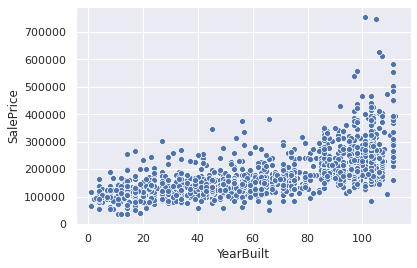

In [56]:
sns.set()
ax = sns.scatterplot(x="YearBuilt", y="SalePrice", data=numerical_column)
#sns.distplot(numerical_column['GarageYrBlt'], hist=True, rug=True);

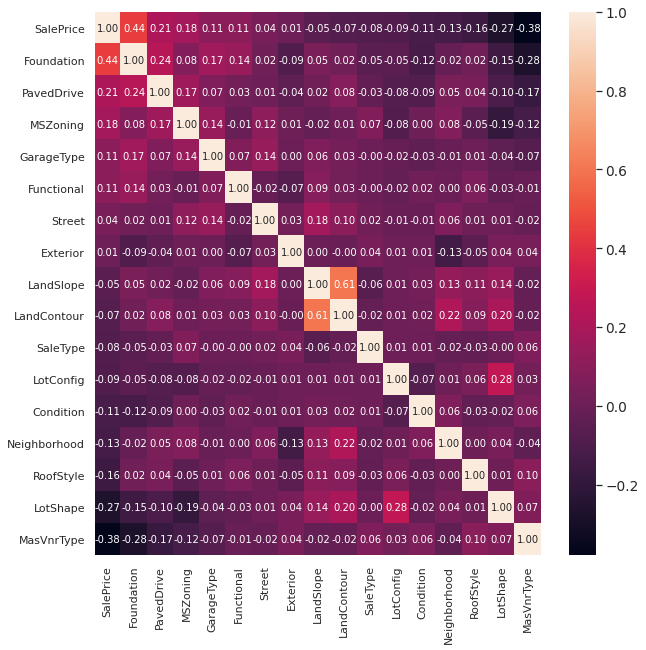

In [57]:
f,ax = plt.subplots(figsize=(10, 10))
corrmat = nominal_mean_encode.corr()
k =20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(nominal_mean_encode[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [58]:
y = numerical_column['SalePrice']
nominal_mean_encode= nominal_mean_encode.drop(['SalePrice'],axis = 1)
ordinal_mean_encode = ordinal_mean_encode.drop(['SalePrice'],axis = 1)
numerical_column = numerical_column.drop(['SalePrice'],axis = 1)

In [59]:
train = pd.concat([nominal_mean_encode,ordinal_mean_encode,numerical_column],axis = 1)
test = pd.concat([nominal_test_mean_encode, ordinal_test_mean_encode, numerical_test],axis = 1)
#train = pd.concat([ordinal_final,numerical_column_final],axis = 1)
#test = pd.concat([ordinal_final_test, numerical_final_test],axis = 1)

In [60]:
train.shape

(1460, 70)

In [61]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [62]:
y = np.asarray(y)
y = y.reshape(-1,1)
scaler.fit(y)
y = scaler.transform(y)

In [63]:
#min_max_scaler = preprocessing.MinMaxScaler()
#train = min_max_scaler.fit_transform(train)
#test = min_max_scaler.fit_transform(test)
#y = min_max_scaler.fit_transform(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

85.33457936311366


32692.370436137197

In [66]:
passref = PassiveAggressiveRegressor(max_iter=1000000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.30132241874426


0.15256271863605772

Train: 0.039, Test: 0.249


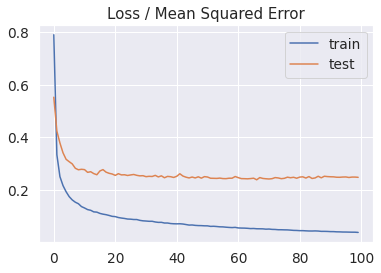

In [67]:

# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X_train,X_test
#trainy, testy = y_train,y_test
trainy = np.array(y_train)
testy = np.array(y_test)
# reshape 1d arrays to 2d arrays
trainy = trainy #.reshape(len(trainy), 1)
testy = testy #.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
#scaler.fit(trainy)
# transform training dataset
#trainy = scaler.transform(trainy)
# transform test dataset
#testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(70, input_dim=70, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % ((train_mse), (test_mse)))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [69]:
y_pred = model.predict(test)
scaler.fit(y_pred)
y_pred = scaler.inverse_transform(y_pred)
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/ur.csv", index=False)

In [ ]:
nominal_count_encode.describe()
#nominal_mean_encode.describe()